# Manejando diferentes direcciones de texto

Muchas de las propiedades y valores que hemos encontrado hasta ahora en nuestro aprendizaje de CSS han estado ligadas a las dimensiones físicas de nuestra pantalla. Estas dimensiones físicas se ajustan adecuadamente al contenido que se visualiza de forma horizontal, y por defecto, la web tiende a apoyar lenguajes de izquierda a derecha, como el castellano o el francés, mejor que aquellos que se escriben de derecha a izquierda, como el árabe.

en los últimos años, CSS ha evolucionado para soportar de mejor forma contenidos en diferente direccionalidad, incluyendo contenido de derecha a izquierda, pero también de arriba-abajo, como el japonés - Estas direccionalidades se llaman __modos de escritura__.

## ¿Qué son los modos de escritura?

Un modo de escritura en CSS se refiere a si el texto está escrito horizontal o verticalmente. La propiedad `writing-mode` permite cambiar de un modo a otro. No necesitas estar trabajando en un lenguaje que use un modo de escritura vertical para querer hacer esto - Podrías cambiar el modo de escritura de partes de tu diseño por razones creativas.

In [1]:
<style>
    .h1-writing-mode {
        writing-mode: vertical-rl;
    }
</style>
<h1 class="h1-writing-mode">Play with writing modes</h1>

Play with writing modes

Los tres valores posibles para la propiedad writing-mode son:

* `horizontal-tb`: dirección de flujo de bloque de arriba abajo. Las frases aparecen horizontales.
* `vertical-rl`: dirección de flujo de bloque de derecha a izquierda. Las frases aparecen verticales.
* `vertical-lr`: dirección de flujo de bloque de izquierda a derecha. Las frases aparecen verticales.

Así, la propiedad writing-mode está configurando en realidad la direccion en que los elementos de nivel bloque son desplegados en la página - ya sea de arriba abajo, derecha a izquierda, o de izquierda a derecha. Luego señala la dirección del flujo de texto en las frases.

## Modos de escritura y diseño en bloque y lineal

El hecho de que algunas cosas se muestran como elementos de bloque y otras como elementos lineales se encuentra ligado al modo de escritura del documento, y no de la pantalla física. Los bloques sólo se presentan desde la parte superior a la inferior de la página si estas usando un modo de escritura que presente el texto horizontalmente, como el español. Por ejemplo

In [7]:
<style>
    .div-flex { display: flex; }
    .div-container3 { width: 300px; height: 300px; margin: 10px; }

    /*  usa writing-mode: horizontal-tb, un modo de escritura horizontal y desde la parte superior de la página a la base */
    .horizontal {
        background-color: grey;
        writing-mode: horizontal-tb;
    }
    /* usa writing-mode: vertical-rl; este es un modo de escritura vertical y de derecha a izquierda. */
    .vertical {
        background-color: grey;
        writing-mode: vertical-rl;
    }
</style>
<div class="div-flex">
    <div class="div-container3 horizontal">
        <h2>Heading</h2>
        <p>A paragraph. Demonstrating Writing Modes in CSS.</p>
    </div>
    <div class="div-container3 vertical">
        <h2>Heading</h2>
        <p>A paragraph. Demonstrating Writing Modes in CSS.</p>
    </div>
</div>

Heading 
 A paragraph. Demonstrating Writing Modes in CSS. 
 
 
 Heading 
 A paragraph. Demonstrating Writing Modes in CSS.

Cuando cambiamos el modo de escritura, estamos cambiando que dirección es en bloque y cuál es lineal. En un modo de escritura `horizontal-tb` La dirección del bloque va de arriba abajo; en un modo de escritura `vertical-rl` el bloque corre de derecha a izquierda horizontalmente. De esta forma la __dimensión del bloque__ es siempre la dirección en la que se muestran los bloques en el modo de escritura en uso. La __dimensión lineal__, es siempre la dirección en que fluye una frase.

Este dibujo muestra las dos dimensiones en un modo de escritura horizontal.

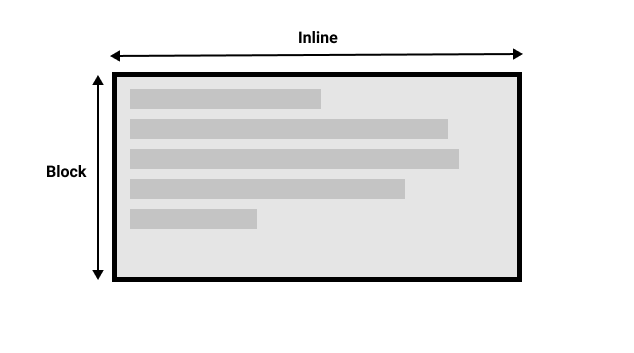

Este dibujo muestra las dos dimensiones en un modo de escritura vertical.

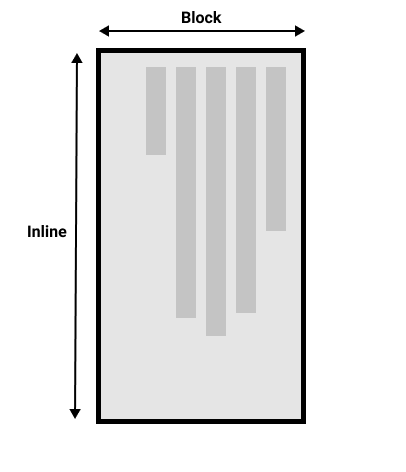

### Dirección

Además del modo de escritura también tenemos la dirección del texto. Como se mencionó antes, algunos idiomas como el Árabe se escriben horizontalmente, de derecha a izquierda. Esto no es algo que usarías en un sentido creativo. Si tu simplemente quieres alinear algún elemento a la derecha, existen otras formas de hacerlo. Sin embargo es importante entender esto como parte de la naturaleza del CSS.

Debido al hecho de que el modo de escritura y la dirección del texto pueden cambiar, los nuevos métodos de diseño CSS no toman como referencia la izquierda y derecha, ni la parte superior e inferior. En su lugar, hablarán de inicio y fin junto con esta idea de en línea y bloque.

## Valores y propiedades lógicas

La razón de hablar acerca de modos de escritura y dirección en este punto en tu aprendizaje, es por el hecho de que ya vimos muchas de estas propiedades que están atadas a las dimensiones físicas de la pantalla, y tienen más sentido cuando está en un modo de escritura horizontal.

In [12]:
<style>
    .div-flex { display: flex; }
    .div-container4 { width: 100px; margin: 10px; }

    .horizontal2 {
        border: 1px solid grey;
        writing-mode: horizontal-tb;
    }
    /* cuando la caja está en el modo de escritura vertical, aún tiene una anchura, y esto está causando que el texto se desborde. */
    .vertical2 {
        border: 1px solid grey;
        writing-mode: vertical-rl;
    }
</style>
<div class="div-flex">
    <div class="div-container4 horizontal2">
        <h2>Heading</h2>
        <p>A paragraph. Demonstrating Writing Modes in CSS.</p>
        <p>These boxes have a width.</p>
    </div>
    <div class="div-container4 vertical2">
        <h2>Heading</h2>
        <p>A paragraph. Demonstrating Writing Modes in CSS.</p>
        <p>These boxes have a width.</p>
    </div>
</div>

Heading 
 A paragraph. Demonstrating Writing Modes in CSS. 
 These boxes have a width. 
 
 
 Heading 
 A paragraph. Demonstrating Writing Modes in CSS. 
 These boxes have a width.

Lo que nosotros realmente queremos en este escenario, es esencialmente intercambiar altura y anchura junto con el modo de escritura. Cuando estamos en el modo de escritura vertical, queremos que la caja se expanda en la dimensión del bloque así como lo hace en el modo horizontal.

Para hacerlo más fácil, CSS ha desarrollado recientemente un conjunto de propiedades asignadas. Estas esencialmente reemplazan las propiedades físicas como `width` and `height`, con versiones __lógicas__ o __relativas al flujo__.

La propiedad asignada a `width` cuando está en el modo de escritura horizontal se llama `inline-size`, se refiere al tamaño en la dimensión inline. La propiedad para `height` se llama `block-size` y es el tamaño en la dimensión de bloque.

In [13]:
<style>
    .div-flex { display: flex; }
    .div-container5 { inline-size: 100px; margin: 10px; }

    .horizontal2 {
        border: 1px solid grey;
        writing-mode: horizontal-tb;
    }
    .vertical2 {
        border: 1px solid grey;
        writing-mode: vertical-rl;
    }
</style>
<div class="div-flex">
    <div class="div-container5 horizontal2">
        <h2>Heading</h2>
        <p>A paragraph. Demonstrating Writing Modes in CSS.</p>
        <p>These boxes have a width.</p>
    </div>
    <div class="div-container5 vertical2">
        <h2>Heading</h2>
        <p>A paragraph. Demonstrating Writing Modes in CSS.</p>
        <p>These boxes have a width.</p>
    </div>
</div>

Heading 
 A paragraph. Demonstrating Writing Modes in CSS. 
 These boxes have a width. 
 
 
 Heading 
 A paragraph. Demonstrating Writing Modes in CSS. 
 These boxes have a width.

### Propiedades lógicas `margin`, `border` y `padding`

En las propiedades margin, border y padding vas a encontrar varias instancias de propiedades físicas, por ejemplo `margin-top`, `padding-left`, y `border-bottom`. Del mismo modo que tenemos asignaciones para ancho y alto, hay asignaciones para estas propiedades.

La propiedad `margin-top` está asignada a `margin-block-start`, esto siempre se va a referir al margen al inicio de la dimensión del bloque.

La propiedad `padding-left` se asigna a `padding-inline-start`, el padding que se aplica al inicio de la dirección inline. Aquí será donde las oraciones comienzan en ese modo de escritura. La propiedad `border-bottom` se asigna a `border-block-end`, que es el borde del final de la dimensión del bloque.

In [18]:
<style>
    .div-flex { display: flex; }
    .div-container6 { inline-size: 200px; writing-mode: horizontal-tb; margin: 10px; }
    .div-container7 { inline-size: 200px; writing-mode: vertical-rl; margin: 10px; }

    .logical {
        margin-block-start: 20px;
        padding-inline-end: 2em;
        padding-block-start: 2px;
        border-block-start: 5px solid pink;
        border-inline-end: 10px dotted rebeccapurple;
        border-block-end: 1em double orange;
        border-inline-start: 1px solid black;
    }
    .physical {
        margin-top: 20px;
        padding-right: 2em;
        padding-top: 2px;
        border-top: 5px solid pink;
        border-right: 10px dotted rebeccapurple;
        border-bottom: 1em double orange;
        border-left: 1px solid black;
    }
    .h2-writing-mode {
        border-bottom: 5px solid black;
    }
</style>
<div class="div-flex">
    <div class="div-container6 physical">
        <h2 class="h2-writing-mode ">Physical Properties</h2>
        <p>A paragraph. Demonstrating Logical Properties in CSS.</p>
    </div>
    <!-- las propiedades físicas se quedan ligadas a sus direcciones físicas -->
    <div class="div-container7 physical">
        <h2 class="h2-writing-mode ">Physical Properties</h2>
        <p>A paragraph. Demonstrating Logical Properties in CSS.</p>
    </div>
    <!-- las propiedades lógicas cambian con el modo de escritura -->
    <div class="div-container7 logical">
        <h2 class="h2-writing-mode ">Logical Properties</h2>
        <p>A paragraph. Demonstrating Logical Properties in CSS.</p>
    </div>
</div>

Physical Properties 
 A paragraph. Demonstrating Logical Properties in CSS. 
 
 
 Physical Properties 
 A paragraph. Demonstrating Logical Properties in CSS. 
 
 
 Logical Properties 
 A paragraph. Demonstrating Logical Properties in CSS.

### Valores lógicos

Existen también algunas propiedades que toman valores físicos de `top`, `right`, `bottom`, y `left`. Estos valores también tienen asignaciones a valores lógicos: `block-start`, `inline-end`, `block-end`, y `inline-start`.

In [24]:
<style>
    .div-flex { display: flex; }
    .div-container6 { inline-size: 200px; writing-mode: horizontal-tb; margin: 10px; }
    .div-container7 { inline-size: 200px; writing-mode: vertical-rl; margin: 10px; }
    .logical2 {
        margin-block-start: 20px;
        padding-inline-end: 2em;
        padding-block-start: 2px;
        border: 2px solid gray;
    }

    /* hace que la imagen flote a la izquierda para hacer que el texto se ajuste alrededor de la imagen. Para esto reemplaza left con inline-start */
    .img-float {
        float: inline-start;
        margin-inline-end: 10px;
        margin-block-end: 10px;
    }
</style>
<div class="div-flex">
    <div class="div-container6 logical2">
        <img src="https://placekitten.com/90/80" alt="cat">
        <p>This box uses logical properties. The star image has been floated inline-start, it also has a margin on the inline-end and block-end.</p>
    </div>
    <div class="div-container7 logical2">
        <img src="https://placekitten.com/90/80" alt="cat">
        <p>This box uses logical properties. The star image has been floated inline-start, it also has a margin on the inline-end and block-end.</p>
    </div>
</div>

This box uses logical properties. The star image has been floated inline-start, it also has a margin on the inline-end and block-end. 
 
 
 
 This box uses logical properties. The star image has been floated inline-start, it also has a margin on the inline-end and block-end.

Aquí también estamos usando valores lógicos de margen para asegurar que el margen está en el sitio correcto sin importar que modo de escritura es.

> Nota: Actualmente, solo __Firefox__ soporta valores relativos de flujo para `float`. Si estás usando __Google Chrome__ o __Microsoft Edge__, deberías ver que la imagen no flota.

### ¿Debería usar propiedades físicas o lógicas?